In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.cm as cm
import matplotlib
import matplotlib as mpl

plt.rcParams['figure.dpi'] = 400


def update_panel_label(df):
    panel = []
    for i in df["Sera pool"]:
        if "BTI_BA.1" in i:
            panel.append("BA.1 BTI")
        elif "BTI_BA.4/5" in i:
            panel.append("BA.4/5 BTI")
        elif "BTI_BA.2.12.1" in i:
            panel.append("BA.2.12.1 BTI")
        elif "BTI_Delta" in i:
            panel.append("Delta BTI")
        elif "Conv_WT" in i:
            panel.append("WT Conv")
        elif "Conv_Delta" in i:
            panel.append("Delta Conv")
        elif "Boost" in i:
            if "Bi" in i:
                panel.append("Bi-valent Boost")
            else:
                panel.append("Boost")
        elif "Vac" in i:
            panel.append("Vaccine")
        else:
            panel.append("else")
    return(panel)

In [6]:
const_df = pd.read_csv('../Data/Supp_TableS4_Construct_Summary.csv')
parent_voc_map = dict(zip(const_df['Name'], const_df['Parent VoC']))

In [7]:
### NEUTRALIZATION DATA ###
neut_df = pd.read_excel('../Data/Supp_TableS7_Neutralization_Data.xlsx', sheet_name='ID50 titers (Pool)')

neut_df = neut_df.melt('Sera pool',var_name = "Name", value_name = "ID50")
neut_df = neut_df.replace({"<20" : 10})
neut_df['ID50'] = neut_df['ID50'].astype(float)
neut_df = neut_df.dropna()
neut_df.head()

,Sera pool,Name,ID50
0,Conv_Delta,B.1,17278.0
1,Conv_WT-1,B.1,9294.0
2,Conv_WT-2,B.1,1788.0
3,Conv_WT-3,B.1,236.0
4,Vac_Mod-1,B.1,1691.0


In [16]:
## Fold reduction per pool for each variant ##
dfs = []
for r in neut_df["Name"].unique().tolist():
    if r == "SARS1":
        continue
        
    variant_df = neut_df[neut_df["Name"] == r].copy()
    base_voc = parent_voc_map[r]

    base_df   = neut_df[neut_df["Name"] == base_voc].copy()
    df_paired = base_df.merge(variant_df, on="Sera pool", how="inner", suffixes=("_base", "_variant"))
    dfs.append(df_paired)

fr_df = pd.concat(dfs, ignore_index=True)
fr_df["Fold Reduction"] = fr_df["ID50_base"] / fr_df["ID50_variant"]
fr_df = fr_df[["Name_variant", "Name_base", "ID50_base", "ID50_variant", "Fold Reduction", "Sera pool"]]
fr_df["panel"] = update_panel_label(fr_df)
fr_df = fr_df.dropna(axis = 0, how = 'any')
fr_df.head()

,Name_variant,Name_base,ID50_base,ID50_variant,Fold Reduction,Sera pool,panel
0,B.1,B.1,17278.0,17278.0,1.0,Conv_Delta,Delta Conv
1,B.1,B.1,9294.0,9294.0,1.0,Conv_WT-1,WT Conv
2,B.1,B.1,1788.0,1788.0,1.0,Conv_WT-2,WT Conv
3,B.1,B.1,236.0,236.0,1.0,Conv_WT-3,WT Conv
4,B.1,B.1,1691.0,1691.0,1.0,Vac_Mod-1,Vaccine


In [17]:
## Average reduction per panel per variant ##
panel_geomean   = fr_df.groupby(["Name_variant", "Name_base", "panel"]).agg({'Fold Reduction':stats.gmean, 
                                                              }).reset_index()

display(panel_geomean.head())

variant_geomean = panel_geomean.groupby(["Name_variant", "Name_base"]).agg({'Fold Reduction':stats.gmean}).reset_index()
display(variant_geomean.head())

,Name_variant,Name_base,panel,Fold Reduction
0,Alpha,B.1,BA.1 BTI,1.182505
1,Alpha,B.1,BA.2.12.1 BTI,1.293589
2,Alpha,B.1,BA.4/5 BTI,2.496512
3,Alpha,B.1,Bi-valent Boost,1.354264
4,Alpha,B.1,Boost,1.157197


,Name_variant,Name_base,Fold Reduction
0,Alpha,B.1,1.527129
1,B.1,B.1,1.000000
2,B.1-10a,B.1,3.027864
3,B.1-10b,B.1,3.489413
4,B.1-10c,B.1,2.849715


In [23]:
panel_order = ['WT Conv', 'Delta Conv', 'Vaccine',  'Boost', 
              'Delta BTI', 'BA.1 BTI', 'BA.2.12.1 BTI', 'BA.4/5 BTI', 'Bi-valent Boost']


voc_order = ['B.1',
            'B.1-2a', 'B.1-2b', 'B.1-2c', 'B.1-2d', 'B.1-4a', 'B.1-4b', 
            'B.1-4c', 'B.1-4d', 'B.1-5a', 'B.1-8a', 'B.1-8c', 'B.1-9b', 
            'B.1-9c', 'B.1-10a', 'B.1-10b', 'B.1-10c',
            'Alpha', 'Beta', 'Delta', 'Gamma',
 
            'BA.1','BA.2','BA.2.12.1','BA.5','BA.2.75',
            
            'BA.2.12.1-2a', 'BA.2.12.1-2c',  'BA.2.12.1-2d', 'BA.2.12.1-2e', 'BA.2.12.1-2f', 'BA.2.12.1-2g', 
            'BA.2.12.1-2h','BA.2.12.1-4a', 'BA.2.12.1-4b', 'BA.2.12.1-5a',
            
            'BA.5-1g', 'BA.5-2a', 'BA.5-2d', 'BA.5-2e', 'BA.5-2f', 'BA.5-3a',
            'BA.5-3b','BA.5-4a','BA.5-5a','BA.5-5b',
        
            'BQ.1', 'BQ.1.1',
            
            'BA.2.75-2a', 'BA.2.75-2b', 'BA.2.75-3a', 'BA.2.75-3b', 'BA.2.75-4a', 'BA.2.75-4b', 
            'BA.2.75-4c', 'BA.2.75-4d', 'BA.2.75-4e', 'BA.2.75-5a', 'BA.2.75-5b', 'BA.2.75-5c', 
            'BA.2.75-5d', 'BA.2.75-6a', 'BA.2.75-6b', 'BA.2.75-6c',
        
            'CH.1.1', 'XBB',
        
            'XBB-1a', 'XBB-2a', 'XBB-3a', 'XBB-4a', 'XBB-5a', 'XBB-5b', 'XBB-5c', 'XBB-6a', 
            'XBB-8a', 'XBB-8b', 'XBB-9a', 'XBB-9b', 'XBB-10a', 'XBB-10b',
        
            'XBB.1', 'XBB.1.5', 'EG.5', 'HV.1',
            
            'BA.2.86', 'JN.1' ]

In [26]:
#Get average ID50 per panel for each variant
neut_df["panel"] = update_panel_label(neut_df)
id50_geomean = neut_df.groupby(["Name", "panel"]).agg({'ID50':stats.gmean}).reset_index()

df_plot = id50_geomean[["panel", "Name",  "ID50"]]
df_plot = df_plot.pivot("panel",  "Name",  "ID50")
df_plot = df_plot[voc_order]
df_plot = df_plot.loc[panel_order]
df_plot = np.log10(df_plot)

panel_geomean['label'] = ['des' if '-' in n else 'const' for n in panel_geomean.Name_variant]

<ipython-input-34-40165a06b1af>:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


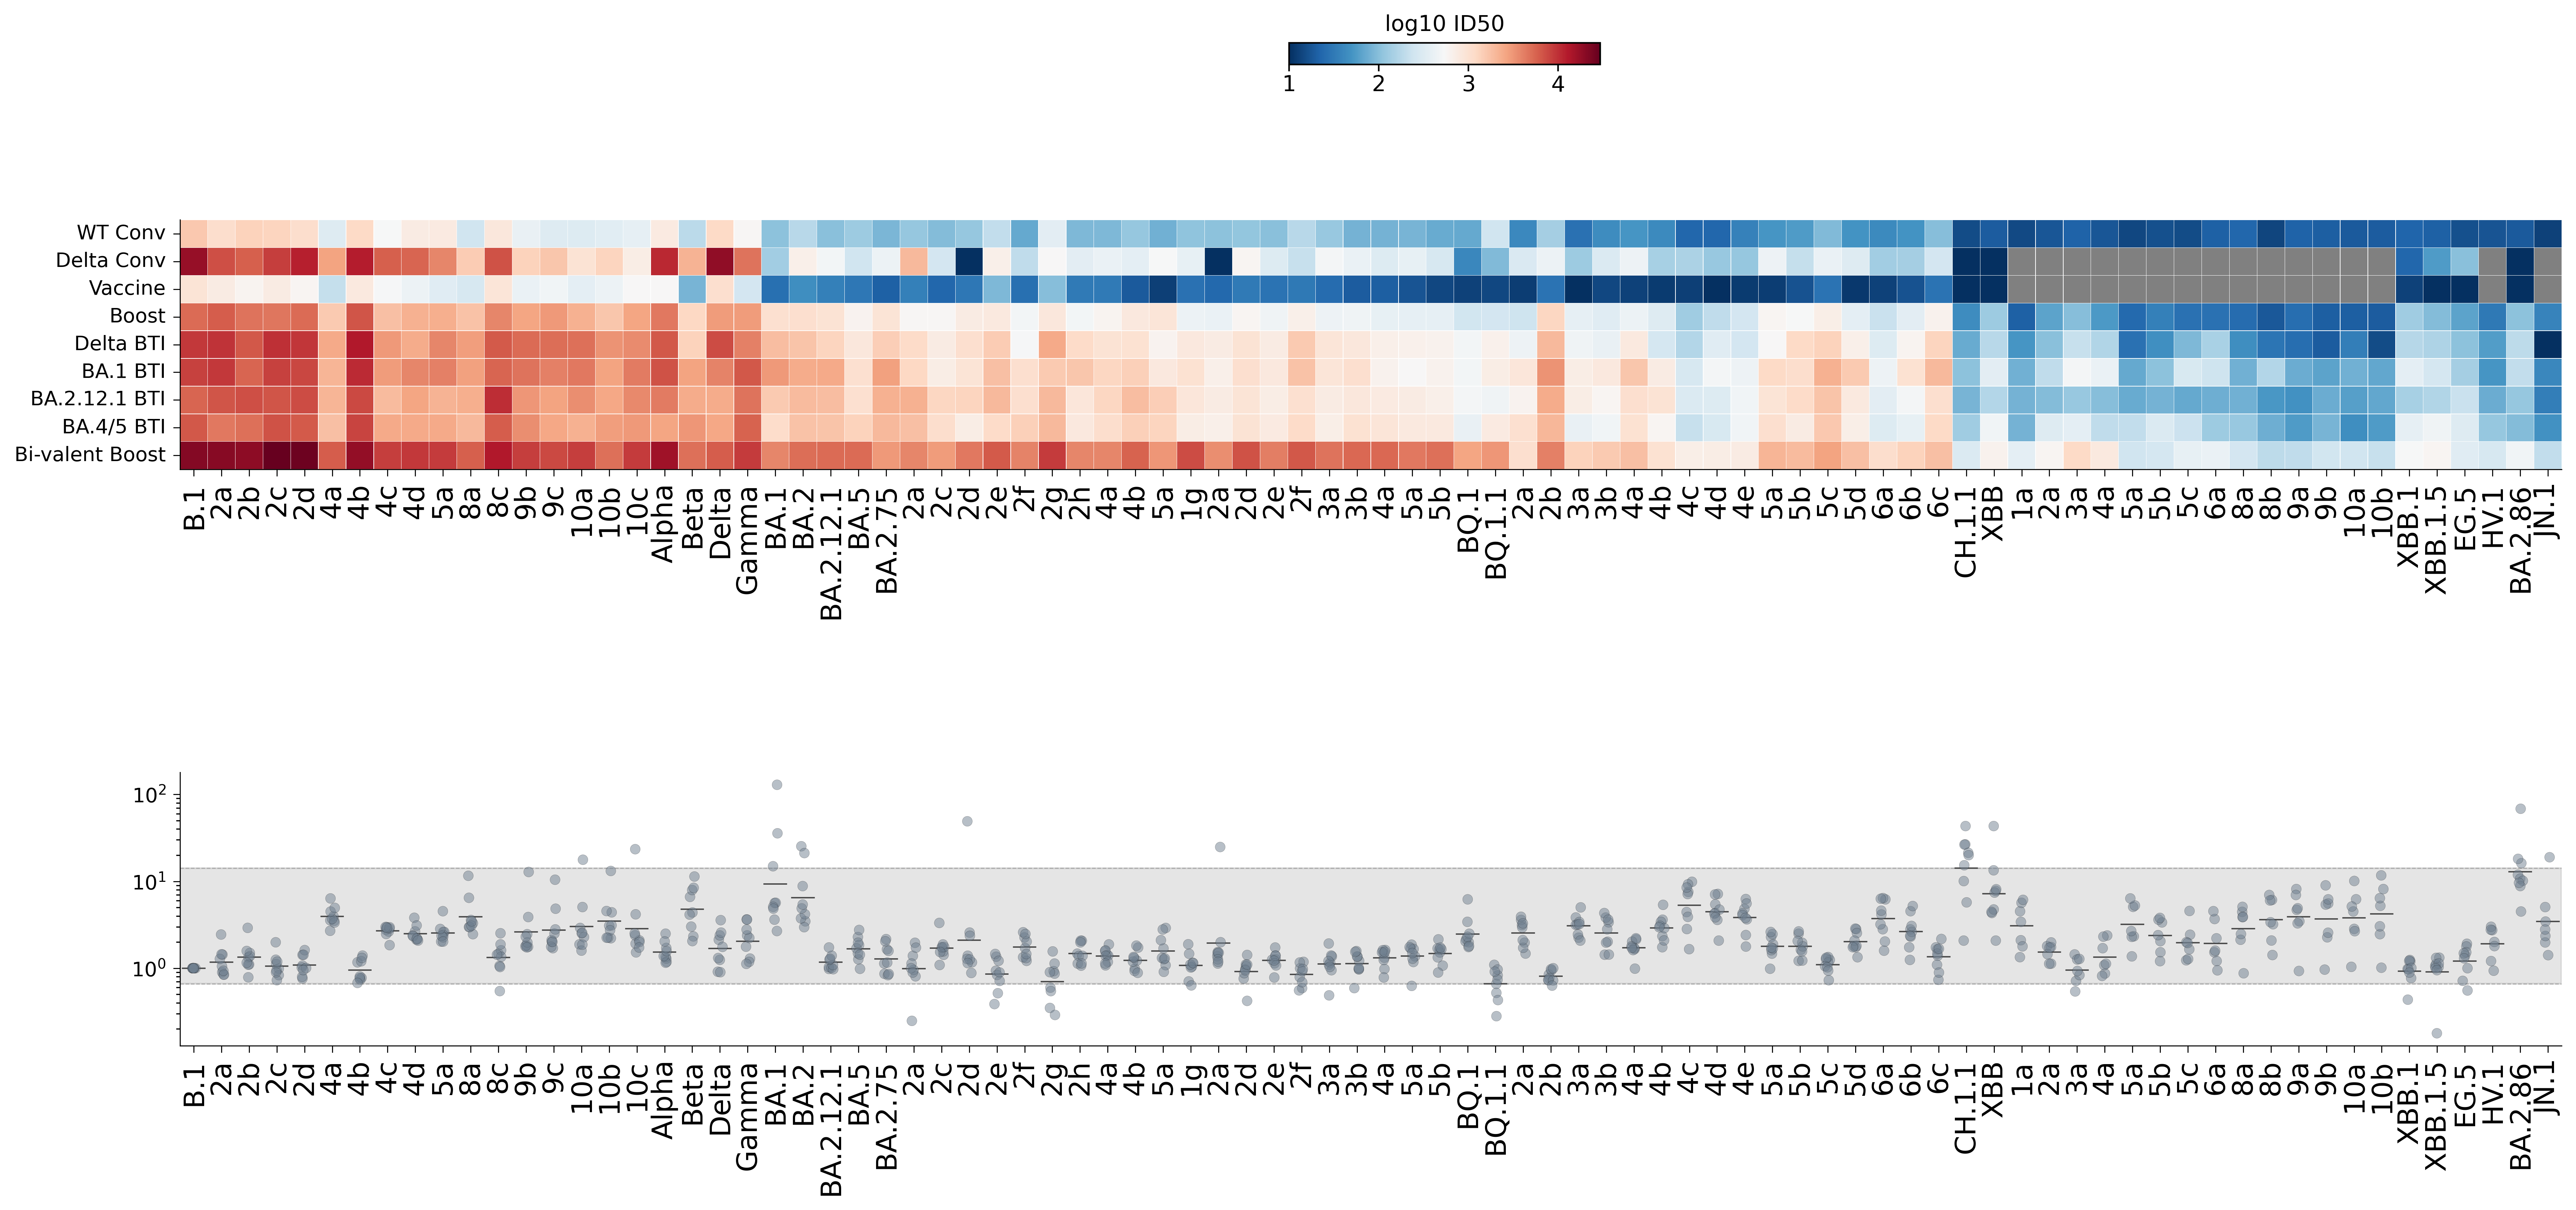

In [34]:
### Figure ### 
x = "Name_variant"; y = "Fold Reduction"

fig, ax = plt.subplots(2, 1, sharey = False, figsize = (18,10), gridspec_kw={'height_ratios' : [4,1]})

############ Subplot A ############
cmap = 'RdBu_r'

sns.heatmap(df_plot,cmap= cmap, square=True,linewidth=0.05, 
            cbar_kws={'shrink': 0.6}, linecolor="#FFFFFF", cbar=False, ax = ax[0])

# color bar 
#im = plt.imshow(df_plot, cmap=cmap)
cbaxes = fig.add_axes([0.5, 0.8, 0.12, 0.015]) 
cbar= plt.colorbar(im, orientation = "horizontal", cax = cbaxes)
cbar.ax.set_title('log10 ID50', fontsize = 11)
cbar.ax.xaxis.set_tick_params(pad=1.5)
cbar.ax.tick_params(labelsize=11)
cbar.cmap.set_bad(color='grey')  # Choose the color for NaN values

############ Subplot B ############
sns.boxplot(data = variant_geomean, x=x, y=y, color ="slategrey",
            order= voc_order, ax = ax[1], zorder = 10, 
           **{"linewidth": 0.7})

sns.stripplot(data = panel_geomean, x=x, y=y,  
            color =  "slategrey", alpha = 0.5,
            order = voc_order, ax = ax[1], zorder = 12,
            **{"linewidth": 0.1, "edgecolor": "k", "size":5})

## add voc fold reduction range
min_val = variant_geomean[~variant_geomean.Name_variant.str.contains('-')]["Fold Reduction"].min()
max_val = variant_geomean[~variant_geomean.Name_variant.str.contains('-')]["Fold Reduction"].max()

ax[1].axhline(min_val, linewidth = 0.5, linestyle = "--", color = "darkgrey", zorder = -1)
ax[1].axhline(max_val, linewidth = 0.5, linestyle = "--", color = "darkgrey", zorder = -1)
ax[1].axhspan(min_val, max_val, color='gray', alpha=0.2, zorder = -1)
ax[1].set_yscale("log")

############# Figure clean up ############
y_ticks = ax[0].get_xticklabels()
names_order_short = [label.get_text().split("-")[-1] for label in y_ticks]
ax[0].set_xticklabels(names_order_short, fontsize = 14)
ax[1].set_xticklabels(names_order_short, fontsize = 14)

for label in ax[1].get_xticklabels():
    label.set_rotation(90)

for ax_i in ax:
    ax_i.set_ylabel("")
    ax_i.set_xlabel("")
    ax_i.xaxis.set_tick_params(width=0.5)
    ax_i.yaxis.set_tick_params(width=0.5)
    plt.setp(ax_i.spines.values(), linewidth=0.5)

plt.legend([],[], frameon=False)
sns.despine()
plt.subplots_adjust(wspace=0)


plt.tight_layout()
plt.savefig("../Figures/Fig2D-E_neut_heatmap_stripplot.svg", dpi=430)